In [1]:
import os
import argparse
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np

In [2]:
DIR_PATH = '/Users/matthausheer/university/howtowritefastnumericalcode/fastcode/benchmark'
FILE_NAME = 'output.txt'

In [3]:
def load_input_size_benchmark_output(dir_name, file_name):

    file_path = os.path.join(dir_name, file_name)

    with open(file_path, 'r') as infile:
        return infile.read().splitlines()

def parse_output(dir_path, file_name):

    lines = load_input_size_benchmark_output(dir_path, file_name)

    git_data = {}
    config = {}
    timings = {'input_size': [], 'cycles': []}

    curr_section = ''

    for line in lines:
        if line == '':
            continue

        if line.startswith('#'):
            curr_section = line.split(' ')[1]
            continue

        if curr_section == 'Git':
            splitted = line.split('-', 1)
            git_data[splitted[0].strip()] = splitted[1].strip()

        elif curr_section == 'Parameters':
            splitted = line.split(':')
            config[splitted[0]] = splitted[1]

        elif curr_section == 'Timings':
            input_size_str, timing_str = line.split(',')

            timings['input_size'].append(int(input_size_str.split(':')[1]))
            timings['cycles'].append(int(timing_str.strip().split(' ')[1]))

    return git_data, config, timings

def setup_figure_1ax(x_label='', y_label='', size=(13, 9), shrink_ax=True):
    """Returns a figure and ax with legend on the right hand side, no spines."""
    matplotlib.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots()
    fig.set_size_inches(size)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Shrink current axis by 20%
    if shrink_ax:
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    return fig, ax


In [4]:
git_data, config, timings = parse_output(DIR_PATH, FILE_NAME)

Text(0.5,0,'Input size n')

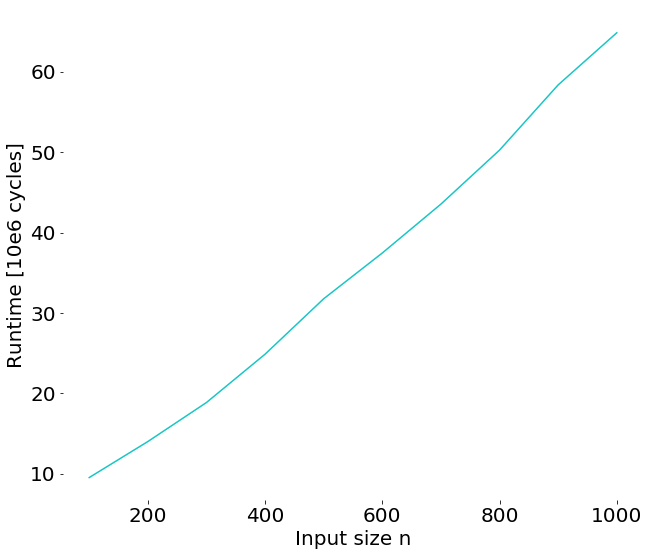

In [5]:
fig, ax = setup_figure_1ax()

ax.plot(np.array(timings['input_size']), np.array(timings['cycles']) / 10e6, '-c', alpha=0.9)
ax.set_ylabel('Runtime [10e6 cycles]')
ax.set_xlabel('Input size n')


In [6]:
config

{'algorithm': 'GWO',
 'max_dim': '1000',
 'max_iterations': '120',
 'max_position': '100',
 'min_dim': '100',
 'min_position': '-100',
 'obj_func': 'sum_of_squares',
 'step_dim': '100',
 'wolf_count': '30'}